## import Library

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import csv

## Import Dataset

In [3]:
data = []

# read the file 
with open("./raw_data.csv", "r") as csvfile:
    file_reader = csv.reader(csvfile)

    for row in file_reader:
        data.append(row)

# change data into numpy array
data = np.array(data)

In [4]:
data
data.shape
np.savetxt("raw_data.npy",data, fmt="%s", delimiter=",")

In [5]:
header = data[0, :]
values = data[1:, :]
print("Header:\n", header, "\n\n Values:\n", values)

Header:
 ['MSN' 'YYYYMM' 'Value' 'Column_Order' 'Description' 'Unit'] 

 Values:
 [['CLETPUS' '194913' '135451.32' '1'
  'Electricity Net Generation From Coal, All Sectors'
  'Million Kilowatthours']
 ['CLETPUS' '195013' '154519.994' '1'
  'Electricity Net Generation From Coal, All Sectors'
  'Million Kilowatthours']
 ['CLETPUS' '195113' '185203.657' '1'
  'Electricity Net Generation From Coal, All Sectors'
  'Million Kilowatthours']
 ...
 ['ELETPUS' '202209' '350919.559' '13'
  'Electricity Net Generation Total (including from sources not shown), All Sectors'
  'Million Kilowatthours']
 ['ELETPUS' '202210' '314048.288' '13'
  'Electricity Net Generation Total (including from sources not shown), All Sectors'
  'Million Kilowatthours']
 ['ELETPUS' '202211' '323198.745' '13'
  'Electricity Net Generation Total (including from sources not shown), All Sectors'
  'Million Kilowatthours']]


## Extract The Geothermal Energy Data

In [6]:
geothermal_cond = values[:,4] == "Electricity Net Generation From Geothermal, All Sectors"
print(geothermal_cond)
geothermal_data = values[geothermal_cond]
print(geothermal_data)
geothermal_data.shape

[False False False ... False False False]
[['GEETPUS' '194913' 'Not Available' '10'
  'Electricity Net Generation From Geothermal, All Sectors'
  'Million Kilowatthours']
 ['GEETPUS' '195013' 'Not Available' '10'
  'Electricity Net Generation From Geothermal, All Sectors'
  'Million Kilowatthours']
 ['GEETPUS' '195113' 'Not Available' '10'
  'Electricity Net Generation From Geothermal, All Sectors'
  'Million Kilowatthours']
 ...
 ['GEETPUS' '202209' '1412.084' '10'
  'Electricity Net Generation From Geothermal, All Sectors'
  'Million Kilowatthours']
 ['GEETPUS' '202210' '1344.275' '10'
  'Electricity Net Generation From Geothermal, All Sectors'
  'Million Kilowatthours']
 ['GEETPUS' '202211' '1468.899' '10'
  'Electricity Net Generation From Geothermal, All Sectors'
  'Million Kilowatthours']]


(672, 6)

In [7]:
geothermal_data

array([['GEETPUS', '194913', 'Not Available', '10',
        'Electricity Net Generation From Geothermal, All Sectors',
        'Million Kilowatthours'],
       ['GEETPUS', '195013', 'Not Available', '10',
        'Electricity Net Generation From Geothermal, All Sectors',
        'Million Kilowatthours'],
       ['GEETPUS', '195113', 'Not Available', '10',
        'Electricity Net Generation From Geothermal, All Sectors',
        'Million Kilowatthours'],
       ...,
       ['GEETPUS', '202209', '1412.084', '10',
        'Electricity Net Generation From Geothermal, All Sectors',
        'Million Kilowatthours'],
       ['GEETPUS', '202210', '1344.275', '10',
        'Electricity Net Generation From Geothermal, All Sectors',
        'Million Kilowatthours'],
       ['GEETPUS', '202211', '1468.899', '10',
        'Electricity Net Generation From Geothermal, All Sectors',
        'Million Kilowatthours']], dtype='<U80')

## Saving File

In [8]:
np.savetxt("geothermal.csv", data, fmt= "%s", delimiter=",")
np.savetxt("geothermal.npy", data, fmt= "%s", delimiter=",")

## EDA-Exploratory Data Analysis

In [9]:
# Return the shape of my data
print("Row: ",geothermal_data.shape[0])
print("colum: ",geothermal_data.shape[1])

Row:  672
colum:  6


## Data Cleaning

in the value column, some data point include "Not Availabe" which means energy were not recorded under geothermal for that year.

In [15]:
geothermal_data[:,1]

array(['194913', '195013', '195113', '195213', '195313', '195413',
       '195513', '195613', '195713', '195813', '195913', '196013',
       '196113', '196213', '196313', '196413', '196513', '196613',
       '196713', '196813', '196913', '197013', '197113', '197213',
       '197301', '197302', '197303', '197304', '197305', '197306',
       '197307', '197308', '197309', '197310', '197311', '197312',
       '197313', '197401', '197402', '197403', '197404', '197405',
       '197406', '197407', '197408', '197409', '197410', '197411',
       '197412', '197413', '197501', '197502', '197503', '197504',
       '197505', '197506', '197507', '197508', '197509', '197510',
       '197511', '197512', '197513', '197601', '197602', '197603',
       '197604', '197605', '197606', '197607', '197608', '197609',
       '197610', '197611', '197612', '197613', '197701', '197702',
       '197703', '197704', '197705', '197706', '197707', '197708',
       '197709', '197710', '197711', '197712', '197713', '1978

In [17]:
available_mask = geothermal_data[:,2] != "Not Available"

geothermal_data = geothermal_data[available_mask]

## Save Clean Geothermal  Data

In [18]:
np.savetxt("geothermal.csv", geothermal_data, fmt="%s", delimiter=",")

In [19]:
annual_mask = np.array([x[-2:] == '13' for x in geothermal_data[:,1]])

In [20]:
annual_geothermal_data = geothermal_data[annual_mask]

In [21]:
annual_geothermal_data

array([['GEETPUS', '196013', '33.368', '10',
        'Electricity Net Generation From Geothermal, All Sectors',
        'Million Kilowatthours'],
       ['GEETPUS', '196113', '94.021', '10',
        'Electricity Net Generation From Geothermal, All Sectors',
        'Million Kilowatthours'],
       ['GEETPUS', '196213', '100.462', '10',
        'Electricity Net Generation From Geothermal, All Sectors',
        'Million Kilowatthours'],
       ['GEETPUS', '196313', '167.953', '10',
        'Electricity Net Generation From Geothermal, All Sectors',
        'Million Kilowatthours'],
       ['GEETPUS', '196413', '203.791', '10',
        'Electricity Net Generation From Geothermal, All Sectors',
        'Million Kilowatthours'],
       ['GEETPUS', '196513', '189.214', '10',
        'Electricity Net Generation From Geothermal, All Sectors',
        'Million Kilowatthours'],
       ['GEETPUS', '196613', '187.988', '10',
        'Electricity Net Generation From Geothermal, All Sectors',
       

## Analysis

In [23]:
np.array([x[2:] == '13' for x in geothermal_data[:,1]])

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

##  Total Energy Generated

In [24]:
all_energy = annual_geothermal_data[:,2].astype(float)

In [25]:
print("The total geothermal energy generated in USA between 1986 - 2021: {} killowatt per hours".format(all_energy.sum()))

The total geothermal energy generated in USA between 1986 - 2021: 597245.372 killowatt per hours


## The Mean of Energy Generated

In [26]:
all_energy.mean()

9632.989870967742

## The Standard Deviation

In [27]:
all_energy.std()

6381.453179198103

In [28]:
all_energy.max()

16788.565

In [29]:
all_energy.min()

33.368

In [31]:
x = annual_geothermal_data[:,1] # year
y = annual_geothermal_data[:,2] # energy

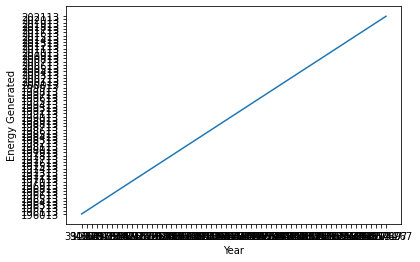

In [35]:
plt.plot(x,y)
plt.xlabel("Year")
plt.ylabel("Energy Generated")
plt.show()